In [1]:
import scipy.io as sio
import dotenv
import os
import numpy as np

dotenv.load_dotenv()

INPUT_FOLDER = "data"

# Bilateral

ECoG shape: (1024398, 64)
ECoG dtype: float64
ECoG min: -3413.33
ECoG max: 2671.98
ECoG mean: 0.08538006834257761
ECoG std: 260.8560070736571


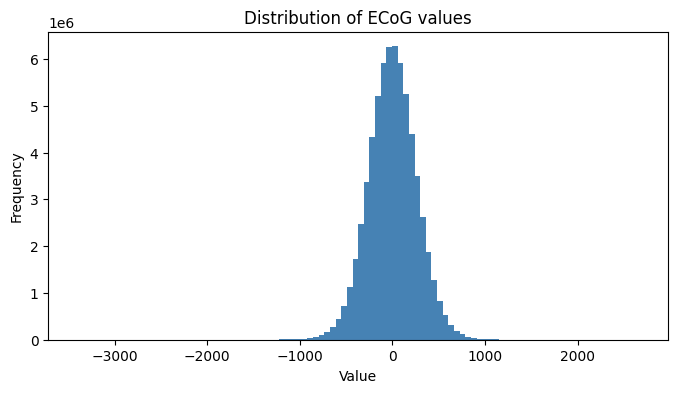

In [3]:
data = sio.loadmat(f"{INPUT_FOLDER}/Bilateral/2018-07-12_(S1)/ECoG.mat")

# Concatenate all ecog arrays along the time/sample axis
ecog = data["ECoG"]
time = data["ECoG_time"] 
print("ECoG shape:", ecog.shape)
print("ECoG dtype:", ecog.dtype)
print("ECoG min:", np.min(ecog))
print("ECoG max:", np.max(ecog))
print("ECoG mean:", np.mean(ecog))
print("ECoG std:", np.std(ecog))

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(ecog.flatten(), bins=100, color="steelblue")
plt.title("Distribution of ECoG values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

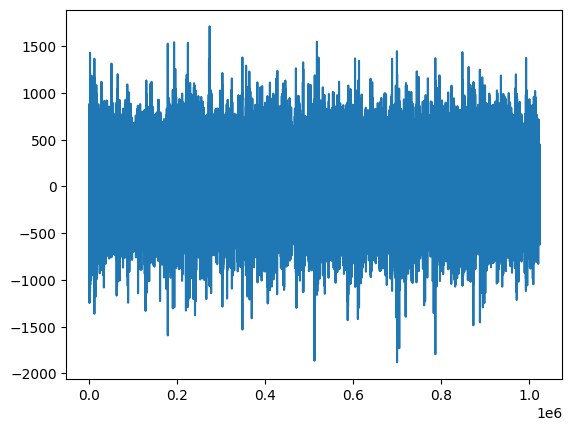

In [10]:
plt.plot(ecog[:,63])

In [4]:
from scipy.signal import butter, filtfilt

ecog = data["ECoG"]
time = data["ECoG_time"]
fs = float(data["Fs"].squeeze())  # Sampling frequency

# Band-pass filter design (1-100 Hz)
lowcut = 1.0
highcut = 100.0
order = 4
nyq = fs / 2
b, a = butter(order, [lowcut / nyq, highcut / nyq], btype='band')

# Apply filter to each channel (axis 1: samples)
ecog_filtered = filtfilt(b, a, ecog, axis=0)

# Z-score normalization of each channel (over time/samples)
ecog_zscored = (ecog_filtered - np.mean(ecog_filtered, axis=0, keepdims=True)) / np.std(ecog_filtered, axis=0, keepdims=True)

# Replace ecog with z-scored, filtered version for subsequent use
ecog = ecog_zscored

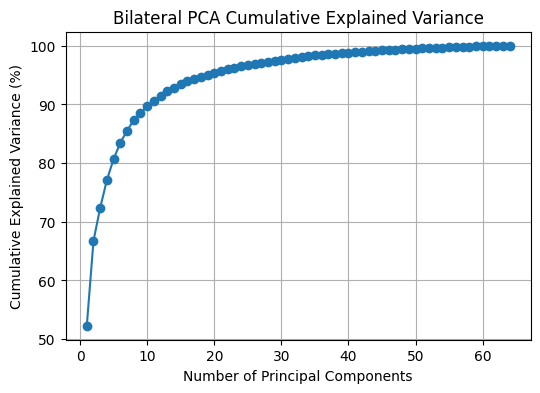

In [5]:
from sklearn.decomposition import PCA
import umap

X = ecog

pca_full = PCA(n_components=min(X.shape[0], X.shape[1]))
X_pca_full = pca_full.fit_transform(X)
explained_var = pca_full.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, len(explained_var)+1), np.cumsum(explained_var)*100, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("Bilateral PCA Cumulative Explained Variance")
plt.grid(True)
plt.show()


In [ ]:


# ecog shape: (n_channels, n_samples)
# We'll treat time (samples) as data points and channels as features for PCA.
# So, transpose to (n_samples, n_channels)
X = ecog

# Apply PCA, retain first 6 principal components
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)  # shape: (n_samples, 6)

print("Explained variance by first 6 PCs:", np.sum(pca.explained_variance_ratio_))

Explained variance by first 6 PCs: 0.9539066518741853


Explained variance by first 6 PCs: 0.834667046889454


/home/danny/Documents/prjkts/motor_cortex/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/danny/Documents/prjkts/motor_cortex/.venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:373: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


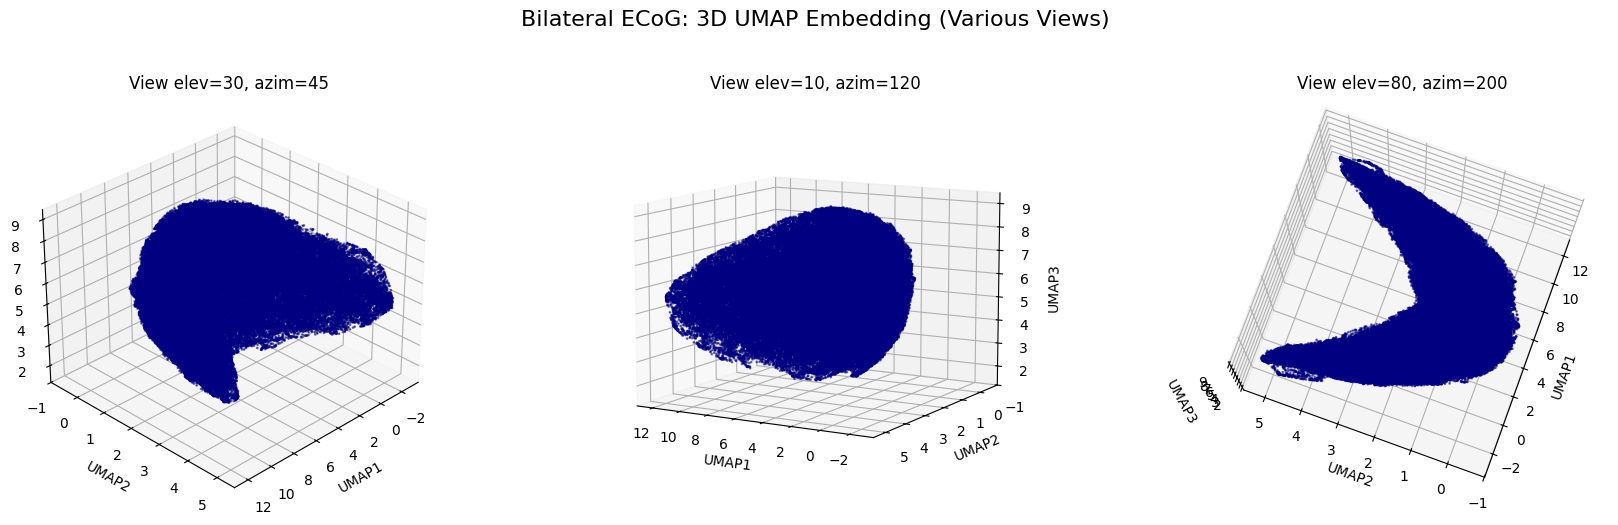

In [ ]:
# Now reduce to 3D with UMAP for visualization
import umap

umap_reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_reducer.fit_transform(X_pca[::10])  # shape: (n_samples, 3)

# Plot 3D UMAP embedding from multiple angles to view geometry better
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 5))
angles = [(30, 45), (10, 120), (80, 200)]  # List of (elev, azim)

fig.suptitle("Bilateral ECoG: 3D UMAP Embedding (Various Views)", fontsize=16, y=1.03)
for i, (elev, azim) in enumerate(angles):
    
    ax = fig.add_subplot(1, len(angles), i + 1, projection="3d")
    ax.scatter(X_umap[:, 0], X_umap[:, 1], X_umap[:, 2], s=1, c="navy", alpha=0.5)
    ax.set_title(f"View elev={elev}, azim={azim}")
    ax.set_xlabel("UMAP1")
    ax.set_ylabel("UMAP2")
    ax.set_zlabel("UMAP3")
    ax.view_init(elev=elev, azim=azim)

plt.tight_layout()
plt.show()


In [ ]:
from ripser import ripser
from persim import plot_diagrams

# data = X_umap[::100]
data = X_pca[]

print(data.shape)

diagrams = ripser(data, maxdim=2)['dgms']
plot_diagrams(diagrams, show=True)

(1024398, 20)


MemoryError: Unable to allocate 7.64 TiB for an array with shape (1024398, 1024398) and data type float64

# Contralateral

ECoG shape: (907298, 64)
ECoG dtype: float64
ECoG min: -3413.33
ECoG max: 2355.21
ECoG mean: 0.6554025494862202
ECoG std: 276.6185245184145


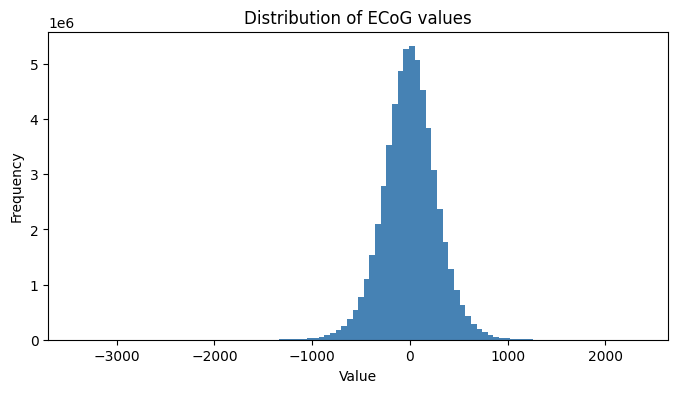

In [ ]:
data = sio.loadmat(f"{INPUT_FOLDER}/Contralateral/2018-03-15_(S1)/ECoG.mat")

# Concatenate all ecog arrays along the time/sample axis
ecog = data["ECoG"]
time = data["ECoG_time"] 
print("ECoG shape:", ecog.shape)
print("ECoG dtype:", ecog.dtype)
print("ECoG min:", np.min(ecog))
print("ECoG max:", np.max(ecog))
print("ECoG mean:", np.mean(ecog))
print("ECoG std:", np.std(ecog))

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(ecog.flatten(), bins=100, color="steelblue")
plt.title("Distribution of ECoG values")    
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [23]:
from scipy.signal import butter, filtfilt

ecog = data["ECoG"]
time = data["ECoG_time"]
fs = float(data["Fs"].squeeze())  # Sampling frequency

# Band-pass filter design (1-100 Hz)
lowcut = 1.0
highcut = 100.0
order = 4
nyq = fs / 2
b, a = butter(order, [lowcut / nyq, highcut / nyq], btype='band')

# Apply filter to each channel (axis 1: samples)
ecog_filtered = filtfilt(b, a, ecog, axis=0)

# Z-score normalization of each channel (over time/samples)
ecog_zscored = (ecog_filtered - np.mean(ecog_filtered, axis=0, keepdims=True)) / np.std(ecog_filtered, axis=0, keepdims=True)

# Replace ecog with z-scored, filtered version for subsequent use
ecog = ecog_zscored

Explained variance by first 6 PCs: 0.7328607248863134


/home/danny/Documents/prjkts/motor_cortex/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


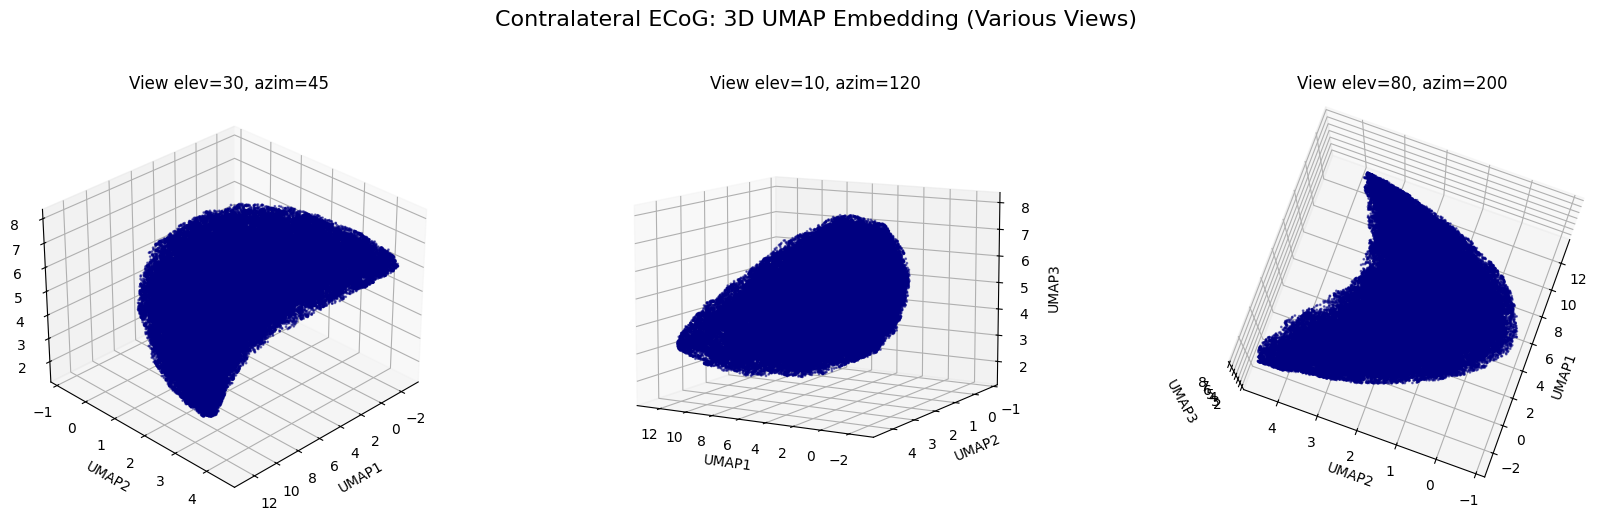

In [24]:
from sklearn.decomposition import PCA
import umap

# ecog shape: (n_channels, n_samples)
# We'll treat time (samples) as data points and channels as features for PCA.
# So, transpose to (n_samples, n_channels)
X = ecog

# Apply PCA, retain first 6 principal components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)  # shape: (n_samples, 6)

print("Explained variance by first 6 PCs:", np.sum(pca.explained_variance_ratio_))

# Now reduce to 3D with UMAP for visualization
import umap
umap_reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_reducer.fit_transform(X_pca[::10])  # shape: (n_samples, 3)

# Plot 3D UMAP embedding from multiple angles to view geometry better
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 5))
angles = [(30, 45), (10, 120), (80, 200)]  # List of (elev, azim)

fig.suptitle("Contralateral ECoG: 3D UMAP Embedding (Various Views)", fontsize=16, y=1.03)
for i, (elev, azim) in enumerate(angles):
    ax = fig.add_subplot(1, len(angles), i+1, projection='3d')
    ax.scatter(X_umap[:,0], X_umap[:,1], X_umap[:,2], s=1, c='navy', alpha=0.5)
    ax.set_title(f'View elev={elev}, azim={azim}')
    ax.set_xlabel('UMAP1'); ax.set_ylabel('UMAP2'); ax.set_zlabel('UMAP3')
    ax.view_init(elev=elev, azim=azim)

plt.tight_layout()
plt.show()


Explained variance by first 6 PCs: 0.834667046889454


/home/danny/Documents/prjkts/motor_cortex/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


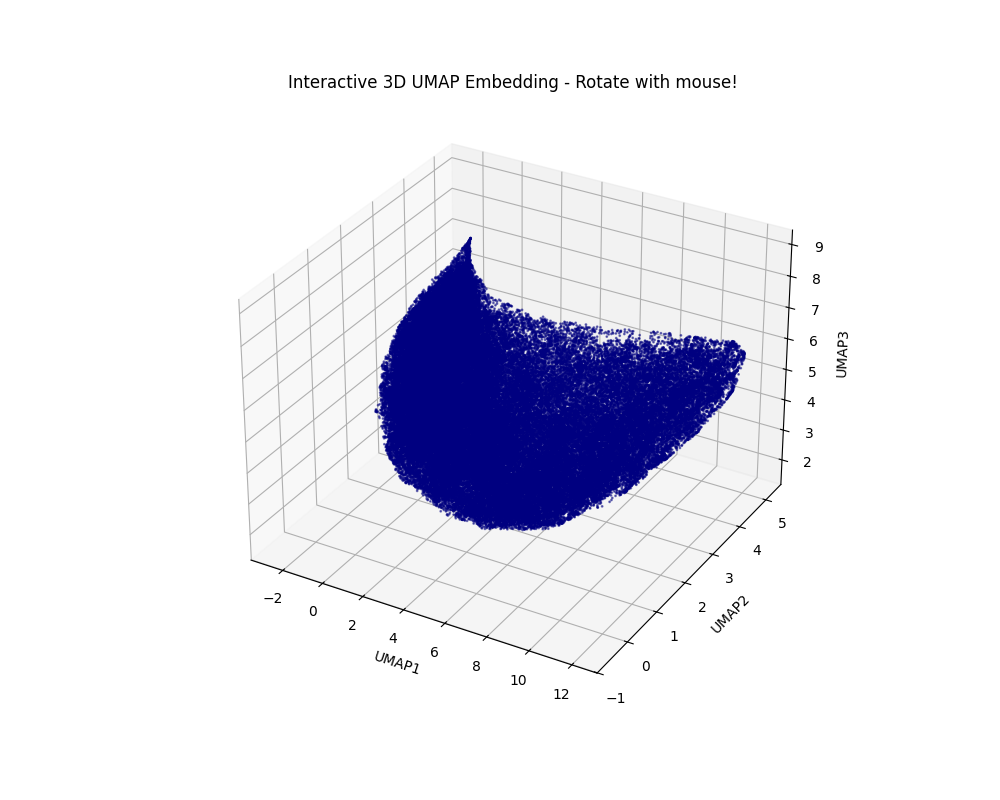

In [5]:
%matplotlib widget
X = ecog
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)
print("Explained variance by first 6 PCs:", np.sum(pca.explained_variance_ratio_))

umap_reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_reducer.fit_transform(X_pca[::10])

# Single interactive 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_umap[:,0], X_umap[:,1], X_umap[:,2], s=1, c='navy', alpha=0.5)
ax.set_title('Interactive 3D UMAP Embedding - Rotate with mouse!')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
plt.show()

In [ ]:
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
import numpy as np

# Subsample data
data = X_umap
print(f"Data shape: {data.shape}")

# Compute persistence diagrams
result = ripser(data, maxdim=2)
diagrams = result['dgms']

# Create a more detailed visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Persistence Diagrams for ECoG UMAP Embedding', fontsize=16, y=1.02)

for i, ax in enumerate(axes):
    plot_diagrams(diagrams[i], ax=ax, show=False)
    ax.set_title(f'H{i} (Dimension {i})', fontsize=14)
    ax.set_xlabel('Birth', fontsize=12)
    ax.set_ylabel('Death', fontsize=12)
    
    # Print persistence information
    if len(diagrams[i]) > 0:
        persistences = diagrams[i][:, 1] - diagrams[i][:, 0]
        persistences = persistences[np.isfinite(persistences)]
        if len(persistences) > 0:
            print(f"H{i}: {len(persistences)} features, max persistence: {np.max(persistences):.4f}")

plt.tight_layout()
plt.show()

# Optional: Plot persistence barcode for H1 (loops)
from persim import plot_diagrams
fig, ax = plt.subplots(figsize=(10, 6))
if len(diagrams[1]) > 0:
    # Sort by persistence
    h1 = diagrams[1]
    persistence = h1[:, 1] - h1[:, 0]
    idx = np.argsort(persistence)[::-1]
    
    for i, j in enumerate(idx[:20]):  # Top 20 features
        birth, death = h1[j]
        if np.isfinite(death):
            ax.barh(i, death - birth, left=birth, height=0.8)
    
    ax.set_xlabel('Filtration Value')
    ax.set_ylabel('Feature Index')
    ax.set_title('Persistence Barcode (H1 - Top 20 loops)')
    plt.tight_layout()
    plt.show()

### Below was the original plot by emil

Explained variance by first 6 PCs: 0.8667281424110854


/Users/emil/Desktop/assignments/TDA/assignment2/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


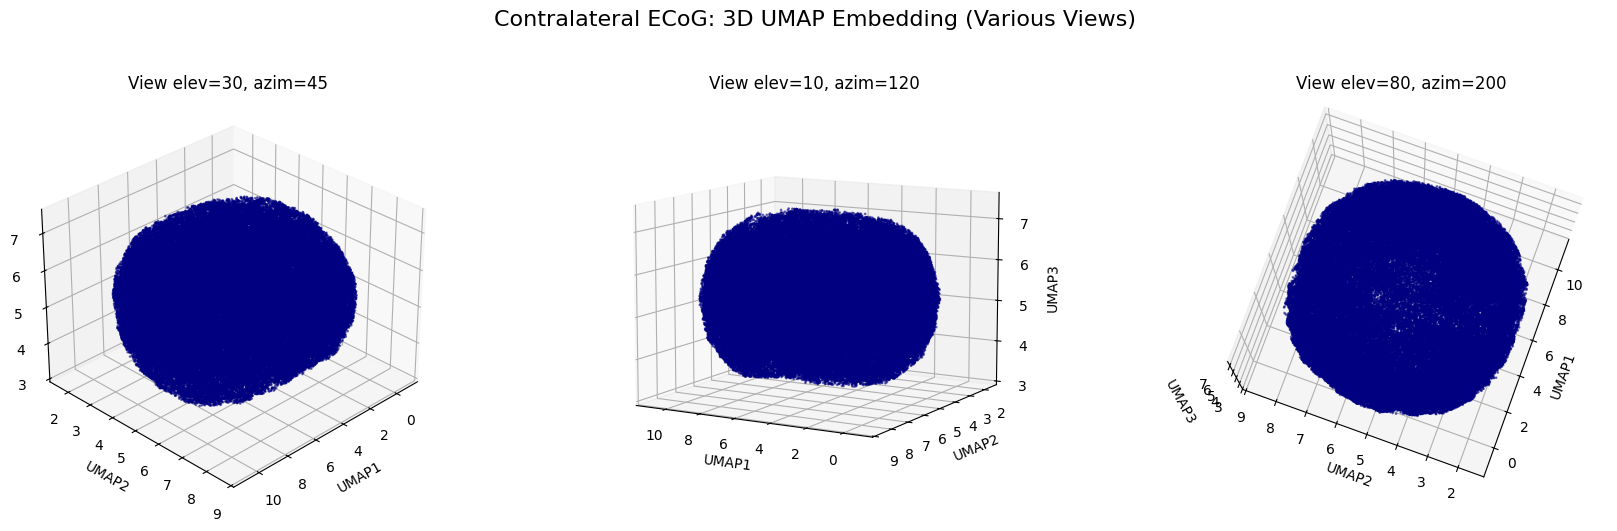

In [47]:
from sklearn.decomposition import PCA
import umap

# ecog shape: (n_channels, n_samples)
# We'll treat time (samples) as data points and channels as features for PCA.
# So, transpose to (n_samples, n_channels)
X = ecog

# Apply PCA, retain first 6 principal components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)  # shape: (n_samples, 6)

print("Explained variance by first 6 PCs:", np.sum(pca.explained_variance_ratio_))

# Now reduce to 3D with UMAP for visualization
import umap
umap_reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_reducer.fit_transform(X_pca[::10])  # shape: (n_samples, 3)

# Plot 3D UMAP embedding from multiple angles to view geometry better
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 5))
angles = [(30, 45), (10, 120), (80, 200)]  # List of (elev, azim)

fig.suptitle("Contralateral ECoG: 3D UMAP Embedding (Various Views)", fontsize=16, y=1.03)
for i, (elev, azim) in enumerate(angles):
    ax = fig.add_subplot(1, len(angles), i+1, projection='3d')
    ax.scatter(X_umap[:,0], X_umap[:,1], X_umap[:,2], s=1, c='navy', alpha=0.5)
    ax.set_title(f'View elev={elev}, azim={azim}')
    ax.set_xlabel('UMAP1'); ax.set_ylabel('UMAP2'); ax.set_zlabel('UMAP3')
    ax.view_init(elev=elev, azim=azim)

plt.tight_layout()
plt.show()


# Ipsilateral

ECoG shape: (920498, 64)
ECoG dtype: float64
ECoG min: -3413.33
ECoG max: 3413.23
ECoG mean: 0.6948211671155176
ECoG std: 943.3876852401363


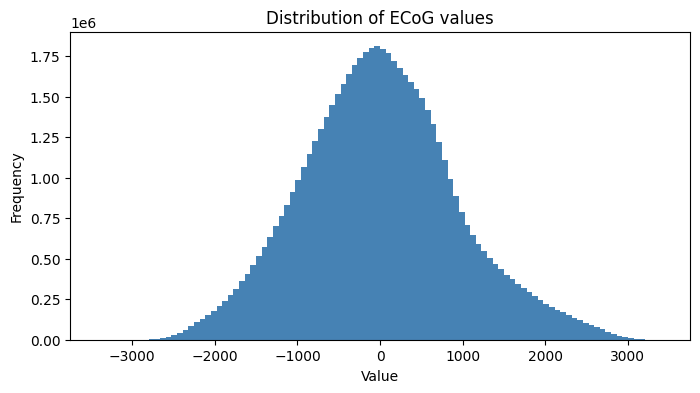

In [26]:
data = sio.loadmat(f"{INPUT_FOLDER}/Ipsilateral/2018-04-29_(S1)/ECoG.mat")

# Concatenate all ecog arrays along the time/sample axis
ecog = data["ECoG"]
time = data["ECoG_time"] 
print("ECoG shape:", ecog.shape)
print("ECoG dtype:", ecog.dtype)
print("ECoG min:", np.min(ecog))
print("ECoG max:", np.max(ecog))
print("ECoG mean:", np.mean(ecog))
print("ECoG std:", np.std(ecog))

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(ecog.flatten(), bins=100, color="steelblue")
plt.title("Distribution of ECoG values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [28]:
from scipy.signal import butter, filtfilt

ecog = data["ECoG"]
time = data["ECoG_time"]
fs = float(data["Fs"].squeeze())  # Sampling frequency

# Band-pass filter design (1-100 Hz)
lowcut = 1.0
highcut = 100.0
order = 4
nyq = fs / 2
b, a = butter(order, [lowcut / nyq, highcut / nyq], btype='band')

# Apply filter to each channel (axis 1: samples)
ecog_filtered = filtfilt(b, a, ecog, axis=0)

# Z-score normalization of each channel (over time/samples)
ecog_zscored = (ecog_filtered - np.mean(ecog_filtered, axis=0, keepdims=True)) / np.std(ecog_filtered, axis=0, keepdims=True)

# Replace ecog with z-scored, filtered version for subsequent use
ecog = ecog_zscored

Explained variance by first 6 PCs: 0.9703724657407788


/home/danny/Documents/prjkts/motor_cortex/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


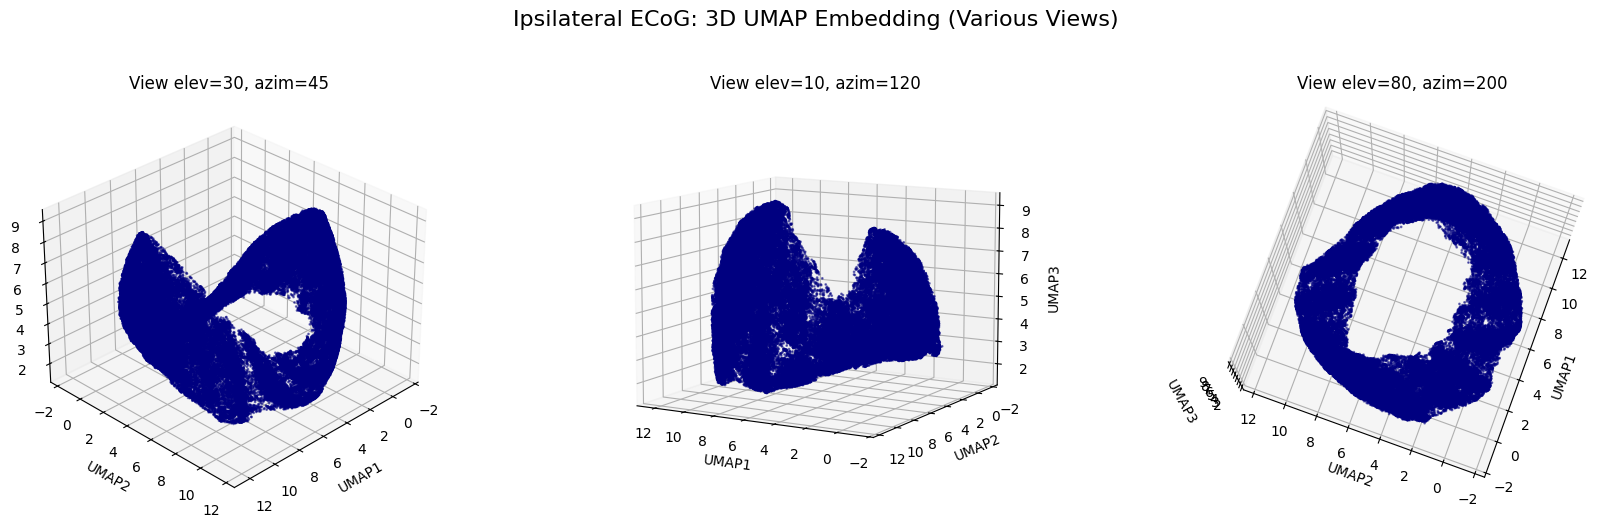

In [29]:
from sklearn.decomposition import PCA
import umap

# ecog shape: (n_channels, n_samples)
# We'll treat time (samples) as data points and channels as features for PCA.
# So, transpose to (n_samples, n_channels)
X = ecog

# Apply PCA, retain first 6 principal components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)  # shape: (n_samples, 6)

print("Explained variance by first 6 PCs:", np.sum(pca.explained_variance_ratio_))

# Now reduce to 3D with UMAP for visualization
import umap
umap_reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_reducer.fit_transform(X_pca[::10])  # shape: (n_samples, 3)

# Plot 3D UMAP embedding from multiple angles to view geometry better
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 5))
angles = [(30, 45), (10, 120), (80, 200)]  # List of (elev, azim)

fig.suptitle("Ipsilateral ECoG: 3D UMAP Embedding (Various Views)", fontsize=16, y=1.03)
for i, (elev, azim) in enumerate(angles):
    ax = fig.add_subplot(1, len(angles), i+1, projection='3d')
    ax.scatter(X_umap[:,0], X_umap[:,1], X_umap[:,2], s=1, c='navy', alpha=0.5)
    ax.set_title(f'View elev={elev}, azim={azim}')
    ax.set_xlabel('UMAP1'); ax.set_ylabel('UMAP2'); ax.set_zlabel('UMAP3')
    ax.view_init(elev=elev, azim=azim)

plt.tight_layout()
plt.show()


### Emil's plot

Explained variance by first 6 PCs: 0.9877586380400344


/Users/emil/Desktop/assignments/TDA/assignment2/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


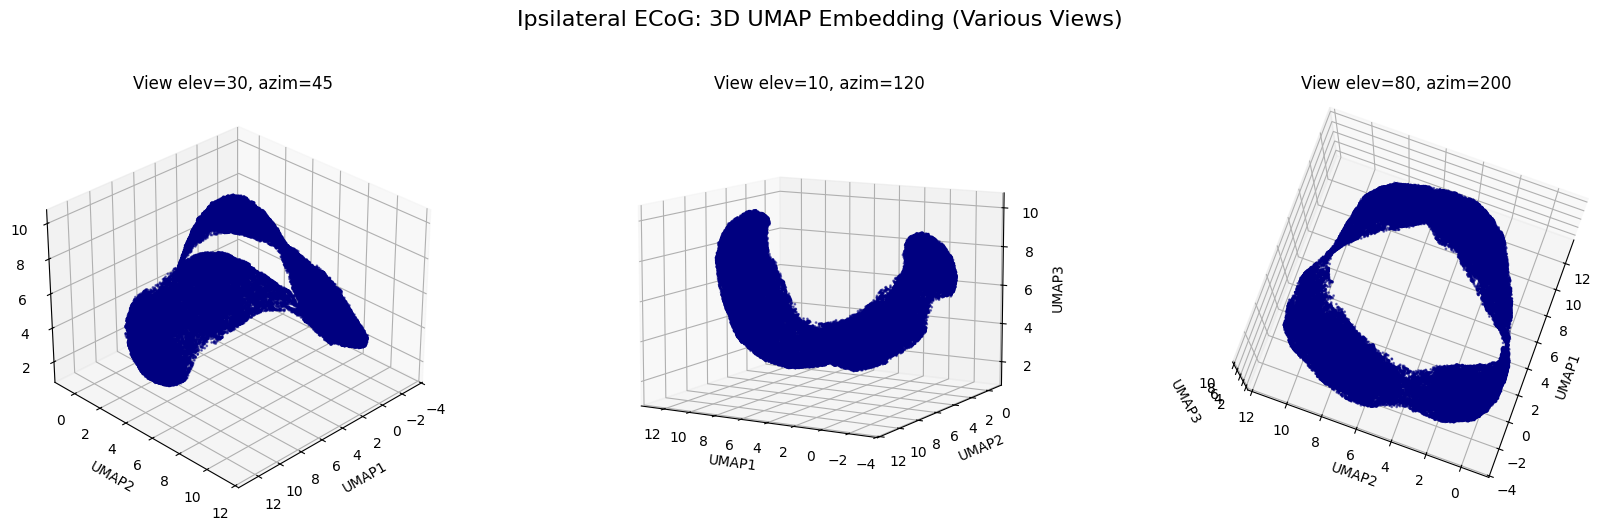

In [51]:
from sklearn.decomposition import PCA
import umap

# ecog shape: (n_channels, n_samples)
# We'll treat time (samples) as data points and channels as features for PCA.
# So, transpose to (n_samples, n_channels)
X = ecog

# Apply PCA, retain first 6 principal components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)  # shape: (n_samples, 6)

print("Explained variance by first 6 PCs:", np.sum(pca.explained_variance_ratio_))

# Now reduce to 3D with UMAP for visualization
import umap
umap_reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_reducer.fit_transform(X_pca[::10])  # shape: (n_samples, 3)

# Plot 3D UMAP embedding from multiple angles to view geometry better
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 5))
angles = [(30, 45), (10, 120), (80, 200)]  # List of (elev, azim)

fig.suptitle("Ipsilateral ECoG: 3D UMAP Embedding (Various Views)", fontsize=16, y=1.03)
for i, (elev, azim) in enumerate(angles):
    ax = fig.add_subplot(1, len(angles), i+1, projection='3d')
    ax.scatter(X_umap[:,0], X_umap[:,1], X_umap[:,2], s=1, c='navy', alpha=0.5)
    ax.set_title(f'View elev={elev}, azim={azim}')
    ax.set_xlabel('UMAP1'); ax.set_ylabel('UMAP2'); ax.set_zlabel('UMAP3')
    ax.view_init(elev=elev, azim=azim)

plt.tight_layout()
plt.show()


(921, 3)


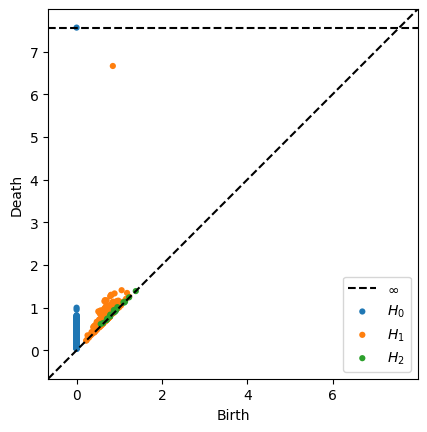

In [30]:
from ripser import ripser
from persim import plot_diagrams

data = X_umap[::100]

print(data.shape)

diagrams = ripser(data, maxdim=2)['dgms']
plot_diagrams(diagrams, show=True)